# Heart Disease EDA analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
import plotly.express as px

# Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/Rupen\Documents/data analysius/Heart Diease/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Preprocessing Data

In [5]:
# Checking for Null values

df.isna().any()  #(could also use df.isnull().sum() to find null values)

# No null values found in dataset. 

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

1. Reviewing Age column

In [6]:
df['Age'].sort_values() 

208    28
219    29
170    29
829    29
215    30
       ..
491    75
541    76
688    76
814    77
447    77
Name: Age, Length: 918, dtype: int64

In [7]:
df['Age'].mean()

53.510893246187365

2. Reviewing Sex

In [8]:
df['Sex'].unique()

# Can only be Male or Female, no other option found hence so issues with this column. 

array(['M', 'F'], dtype=object)

3. Reviewing Chest pain Type column 

In [9]:
df['ChestPainType'].unique()

#4 Catergories observed, as such they should be: (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

4. Inpsecting RestingBP 

In [10]:
df['RestingBP'].sort_values()
# Impossible to have a restingBP of 0 otherwise patient would be deceased. We will need to insepct this portion of the data and see why this is the case. 

449      0
314     80
227     92
692     94
832     94
      ... 
759    192
399    200
732    200
241    200
365    200
Name: RestingBP, Length: 918, dtype: int64

In [11]:
# Replacing 0 with average/mean
df['RestingBP'] = df['RestingBP'].replace({0:df['RestingBP'].mean() })

5. Cholesterol

In [12]:
df['Cholesterol'].sort_values()

# Values of 0 Cholesterol makes no sense hence we need to fill these values. 

458      0
369      0
368      0
367      0
366      0
      ... 
250    491
30     518
76     529
616    564
149    603
Name: Cholesterol, Length: 918, dtype: int64

In [13]:
# Cannot leave Cholestrol levls at 0 replaced values with mean values. 
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


Reviewing FastingBS

In [14]:
df['FastingBS'].unique()
# FastingBS contains only 0 and 1 which represents ( [1: if FastingBS > 120 mg/dl, 0: otherwise]).

array([0, 1], dtype=int64)

Reviewing RestingECG

In [15]:
df['RestingECG']

0      Normal
1      Normal
2          ST
3      Normal
4      Normal
        ...  
913    Normal
914    Normal
915    Normal
916       LVH
917    Normal
Name: RestingECG, Length: 918, dtype: object

In [16]:
df['RestingECG'].unique()
# 4 catergories of Resting ECG ( [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria])

array(['Normal', 'ST', 'LVH'], dtype=object)

Revewing MaxHR

In [17]:
df['MaxHR'].sort_values()
# Heart Rate ranges seem to be reasonable no need to change any values. 

390     60
370     63
402     67
496     69
399     70
      ... 
844    190
753    192
795    194
759    195
829    202
Name: MaxHR, Length: 918, dtype: int64

In [18]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Reviewing ExerciseAngina

In [19]:
df['ExerciseAngina'].describe()
# Values of excercise Angina can only be Yes or No hence no issues here with data. 

count     918
unique      2
top         N
freq      547
Name: ExerciseAngina, dtype: object

Reviewing OldPeak.

In [20]:
df['Oldpeak'].describe()
# values are measured as ST depression, values dont seem to be off or skewed. 

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

Reviewing  ST_Slope 

In [21]:
df['ST_Slope'].describe()
# ST_Slope is caterogrised into 4( up:upsloping, Flat: flat, Down: downslopin)

count      918
unique       3
top       Flat
freq       460
Name: ST_Slope, dtype: object

Reviewing Heart Disease Column 

In [22]:
df['HeartDisease'].unique()
df['HeartDisease'].describe()
# HeartDisease is entered in as 1 and 0 where 1 = Heart Disease  and 0 = Normal/no heart disease. 

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

# Data Visulisation/EDA

In [23]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


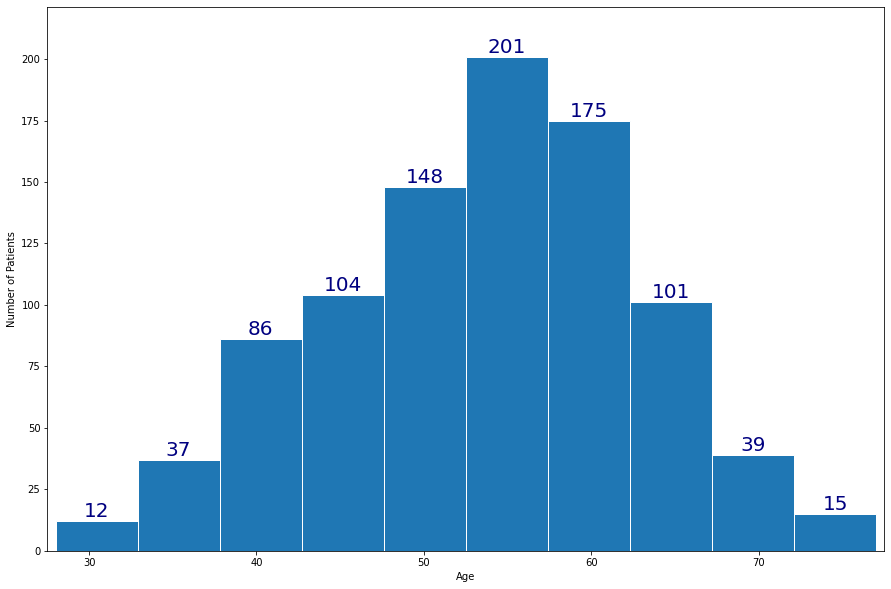

In [24]:
# Graphing distrubtion of age.
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(df['Age'], edgecolor='white')
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title = ('Age Distrubtion')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()


Based on the distrubution we can see that our population lies within the 50 - 60 range with most of our participants being Males and a smaller percentage being female.

In [25]:
# Graphing distrubution of Gender of patients. 

px.pie(df, 'Sex', color = 'Sex', hole = 0.5, title = 'Patient gender Proportion')
                           

Most of our patients are males patients with a smaller percentage being female. This should be noted as data can reveal more about male patient then female. 

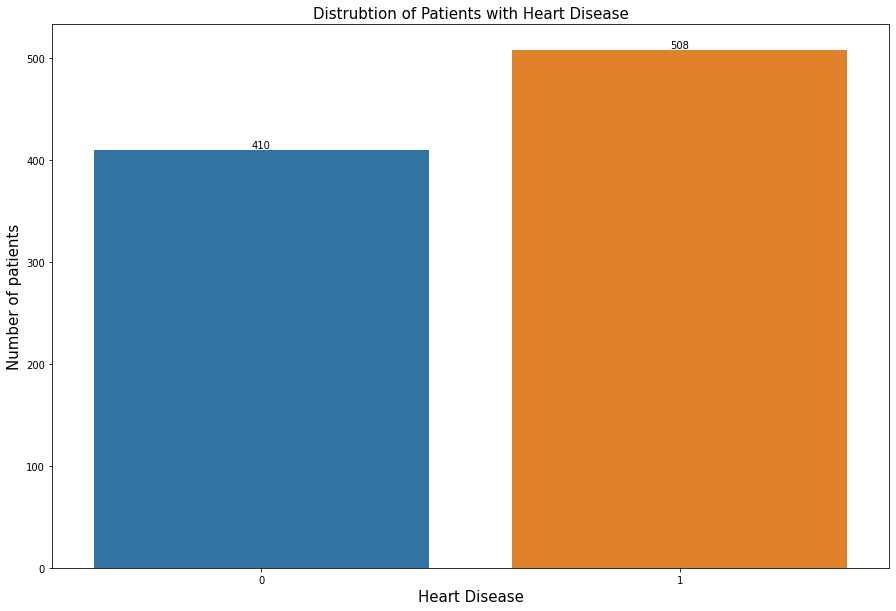

In [26]:
# Percentage of Patients who have Heart Disease. 

plt.figure(figsize=(15,10))
ax1 = sns.countplot(data = df, x = df['HeartDisease'])
ax1.set_title('Distrubtion of Patients with Heart Disease',fontsize = 15)
ax1.set_xlabel('Heart Disease', fontsize = 15)
ax1.set_ylabel('Number of patients', fontsize = 15)
# Labelling data points: 
for container in ax1.containers:
    ax1.bar_label(container)



Most of our patients have heart disease with slightly less than 50 percent being normal. 

1. Reviewing RestingBP 

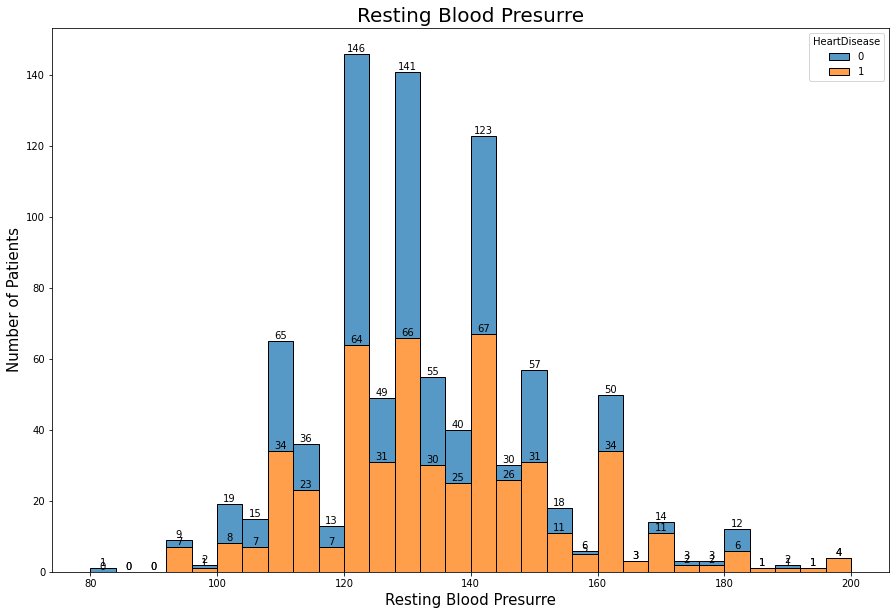

In [27]:
# Graphing Distrubution of RestingBP with and without heartdisease 
#Full Distrbution plot. 
plt.figure(figsize=(15, 10))
ax = sns.histplot(data = df, x = df['RestingBP'],hue=df['HeartDisease'],multiple="stack")# 0 is normal and 1 is heart disease patients. 
ax.set_title('Resting Blood Presurre', fontsize = 20)
ax.set_xlabel('Resting Blood Presurre', fontsize = 15)
ax.set_ylabel('Number of Patients', fontsize = 15)
#Labelling data points. 
for container in ax.containers:
    ax.bar_label(container)


Based on the information most those that have heart disease have Resting BP over 120 however there are patients who are normal  who have this much BP hence he would be hard press to say that this is only occurring with heart disease patients  with high BP, however it can be a factor. 

3. Cholesterol

In [30]:
df['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

Text(0.5, 0.98, 'Heart Disease/Normal Patients vs Cholesterol')

<Figure size 1080x720 with 0 Axes>

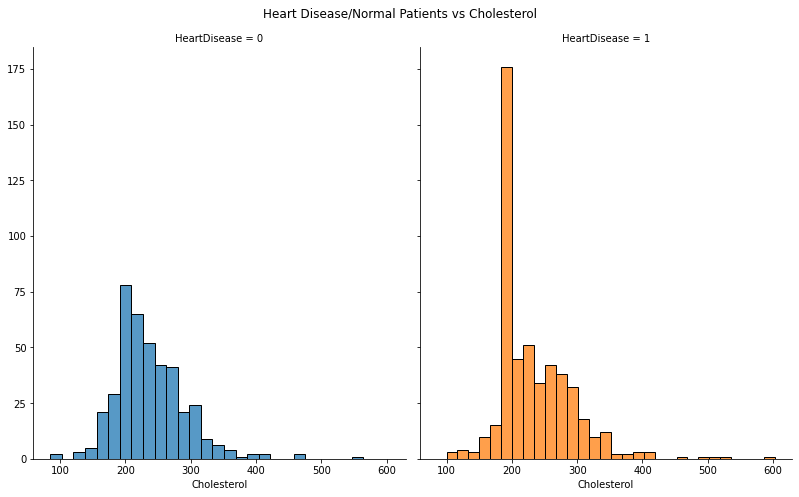

In [31]:
#plotting a histrogram for cholesterol:
plt.figure(figsize=(15,10))
g = sns.FacetGrid(data = df, col="HeartDisease",height=7, aspect=0.8, hue = 'HeartDisease', margin_titles=True)
g.map(sns.histplot, "Cholesterol")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Heart Disease/Normal Patients vs Cholesterol')

Cholesterol level of 200 is considered normal however over this amount is considered borderline high and levels of cholesterol > 240 would indicate high cholesterol levels. Our data indicates our patient group cholesterol levels is grouped between levels of 200 - 300 for both normal and heart disease patients. Maybe having a closer look at patients at this level could indicate certain patterns. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


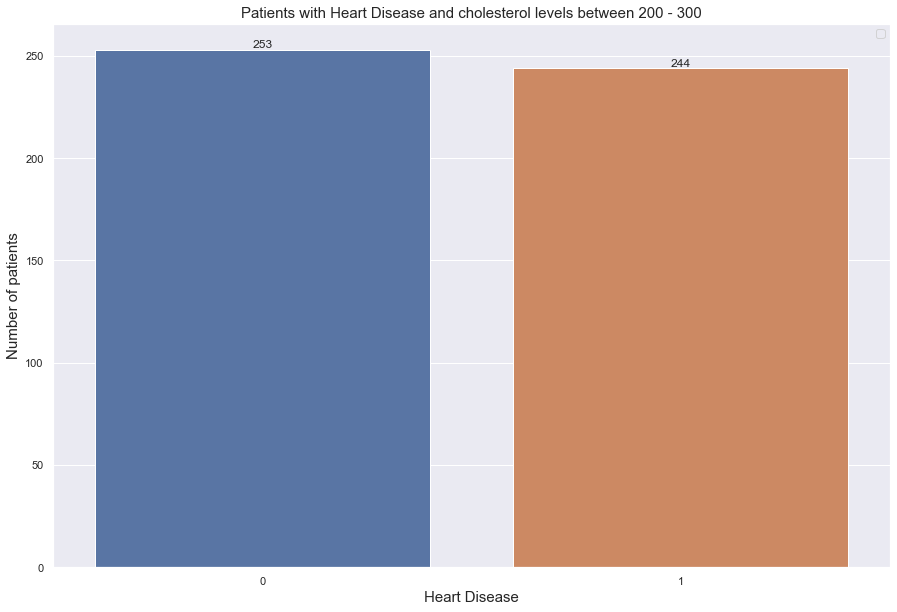

In [32]:
# Data frame for Patients whose cholesterol levels are between 200 - 300
df_cholesterol = df[df['Cholesterol'].between(200, 300)]
#Looking at count of patietnts who have heart diease between 200 - 300 
#Plotting for Heartdisease
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
ax4 = sns.countplot(data = df_cholesterol, x = df_cholesterol['HeartDisease'])
ax4.set_title('Patients with Heart Disease and cholesterol levels between 200 - 300',fontsize = 15)
ax4.set_xlabel('Heart Disease', fontsize = 15)
ax4.set_ylabel('Number of patients', fontsize = 15)
ax4.legend()
# Labelling data points: 
for container in ax4.containers:
    ax4.bar_label(container)

Cholesterol doesnt seem to be a good detector of heart disease as normal patients seem to also have high levels of cholesterol with more than half our normal patient sample size having cholesterol levels between 200 -300. In the end Cholesterol alone cannot be a factor to show correlation for heart disease. We could use Cholesterol and other column attributes to see if there is any correlation between the variables( eg, high cholesterol and high resting BP = More prone to heart disease. )

In [33]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


No Patterns can be see which indicates higher levels of cholesterol and higher levels of Resting BP, we cannot see grouping of heart disease patients every data points seems to be localised between the 200 - 300 Cholesterol level and a RestingBP of 120 - 140.  This data itself can be useful in stating that this could be a possible alert of poential heart disease however is not a clear indication.  

Text(0.5, 1.0, 'Pairplot of Cholesterol,RestingBP and MaxHR')

<Figure size 1440x1080 with 0 Axes>

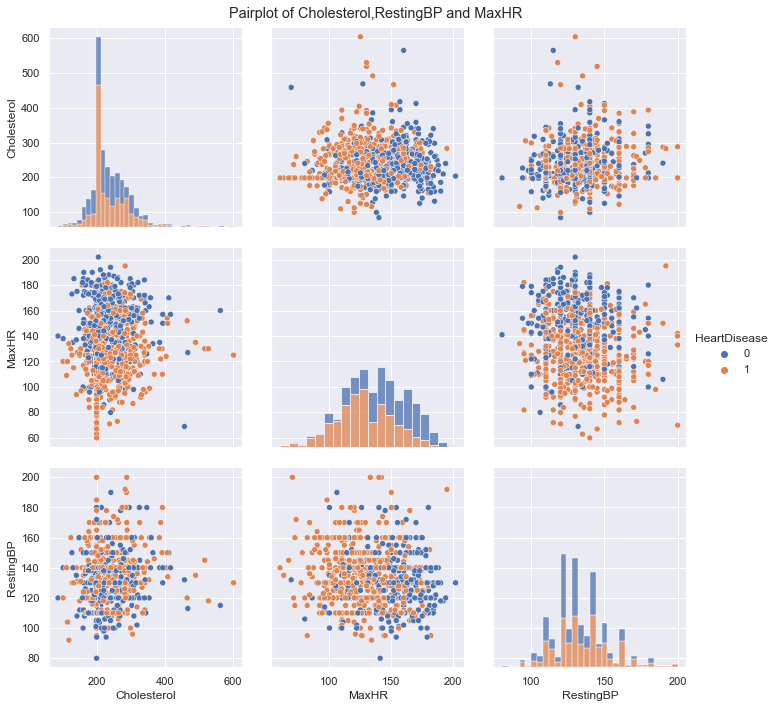

In [34]:
#Plotting for Cholesterol  vs Resting BP vs MaxHR
plt.figure(figsize=(20,15))
p = sns.PairGrid(df, hue = 'HeartDisease',  vars=["Cholesterol", "MaxHR", 'RestingBP'])
p.map_diag(sns.histplot,multiple="stack")
p.map_offdiag(sns.scatterplot)
p.fig.set_size_inches(10,10)
p.add_legend()
p.fig.suptitle("Pairplot of Cholesterol,RestingBP and MaxHR", y=1.00)

1. Cholesterol vs MaxHR: 
More Heart Disease patietnts have lower Max Heart rate then normal patients(however i can see this being due to the less number of normal patients),however the bulk of lies between 200-300 and MaxHR of 100 to 150.

2. Cholestrol vs RestingBP: 
As cholesterol increases Resting BP seems to stay within 100 - 150 range regardless if the patient is normal or has confirmed heart disease. 

3. Max HR vs Resting BP:
As MaxHR increases generally resting BP stays within the 100 - 150 range more of the heart disease patients lie within the 100-150 range for resting BP and 80 - 140 MaxHR. 

Looking at all 3 aspects there is no clear relationship between the variables to indicate which variable would be a good predictor of heart disease. However this could be due to a limited data set of normal vs confirmed cases of heart disease. 

2. Reviewing Catergorical Data. 

In [35]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


a. FastingBS. 

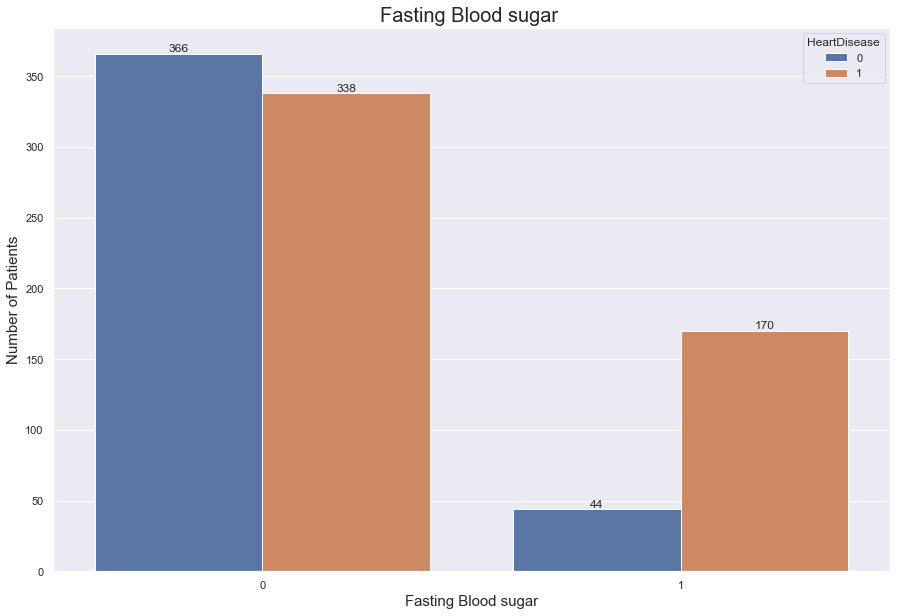

In [36]:
#FastingBS 
plt.figure(figsize=(15,10))
ax7 = sns.countplot(data = df, x='FastingBS', hue = 'HeartDisease')
ax7.set_title('Fasting Blood sugar ', fontsize = 20)
ax7.set_xlabel('Fasting Blood sugar', fontsize = 15)
ax7.set_ylabel('Number of Patients', fontsize = 15)
# Labelling data points: 
for container in ax7.containers:
    ax7.bar_label(container)


Of the portion that has heart disease we can see a smaller portion with a fasting blood sugar levels > 120.

b. RestingECG

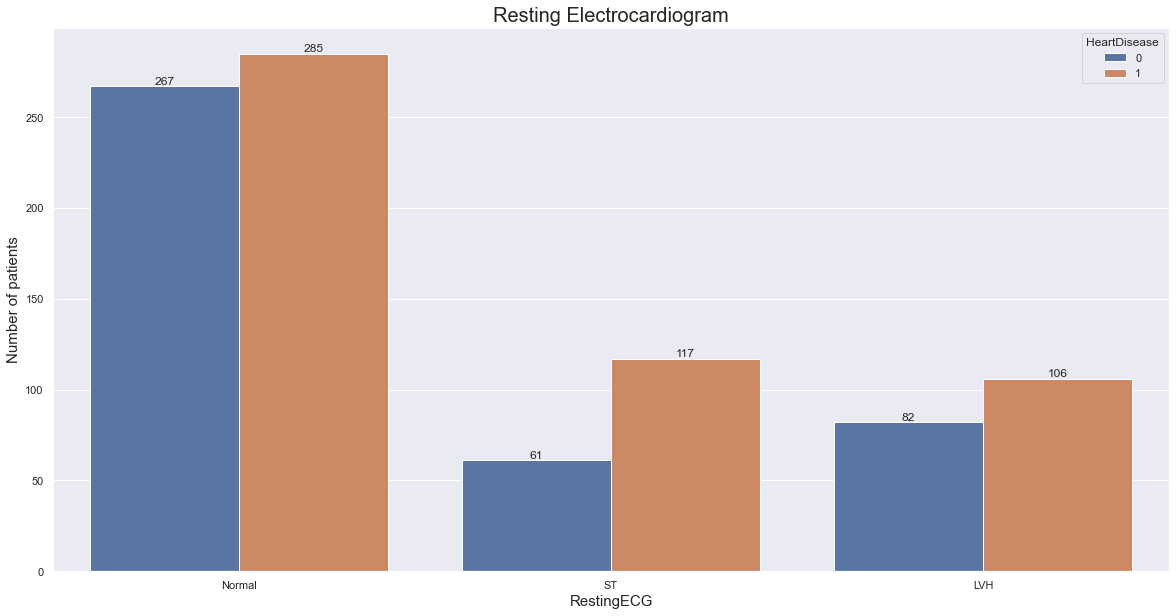

In [56]:
#RestingECG graphing for number of count in each catergory. 
plt.figure(figsize=(20,10))
ax8 = sns.countplot(data = df, x='RestingECG', hue = 'HeartDisease')
ax8.set_title('Resting Electrocardiogram', fontsize = 20)
ax8.set_xlabel('RestingECG', fontsize = 15)
ax8.set_ylabel('Number of patients', fontsize = 15)
# Labelling data points: 
for container in ax8.containers:
    ax8.bar_label(container)



Each catergory has higher number of Heart Disease patietnts(This may be due to a higher prportion of heart disease patients in the study) however we can see that ST has a higher proportion of Heart Disease to normal paitnet ratio, which could indicate infomration here about patient with heart disease. However again it is hard to tell from this plot whether heart disease would be preveleant in a single catergory.

c. Chest Pain type

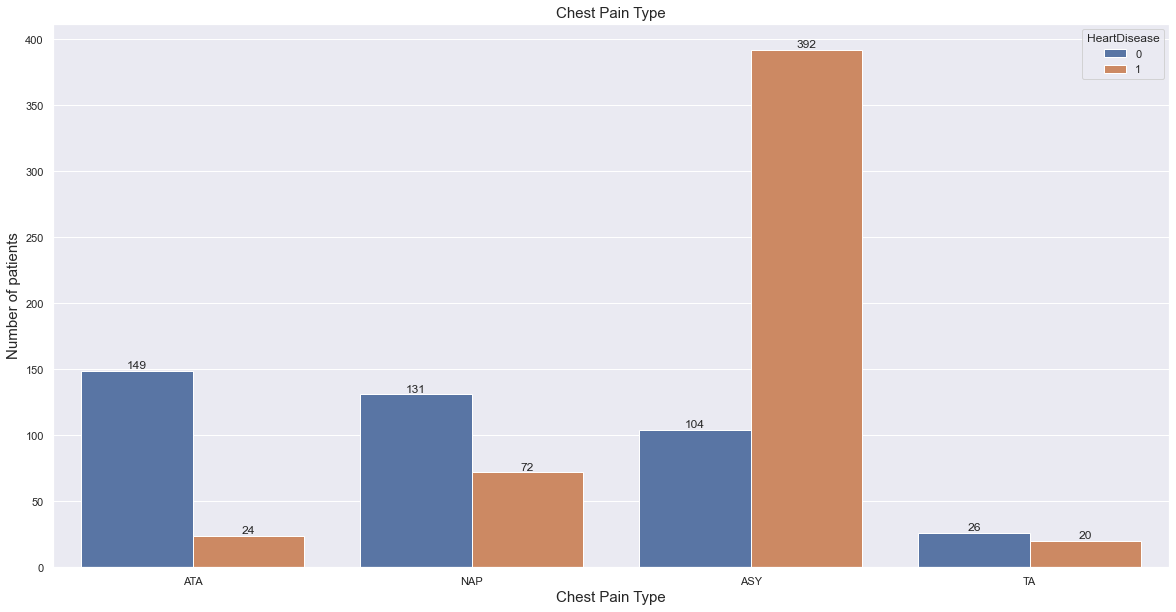

In [55]:
plt.figure(figsize=(20,10))
ax2 = sns.countplot(data = df, x = df['ChestPainType'], hue = 'HeartDisease')
ax2.set_title('Chest Pain Type',fontsize = 15)
ax2.set_xlabel('Chest Pain Type', fontsize = 15)
ax2.set_ylabel('Number of patients', fontsize = 15)
# Labelling data points: 
for container in ax2.containers:
    ax2.bar_label(container)

Comparing each catergory the outlier here is those that are ASY. Here we can clearly see a higher proportion of those who are ASY and have heart disease, which can indicate that early signs of heart disease is harder to find. 

d. Excercise Angina

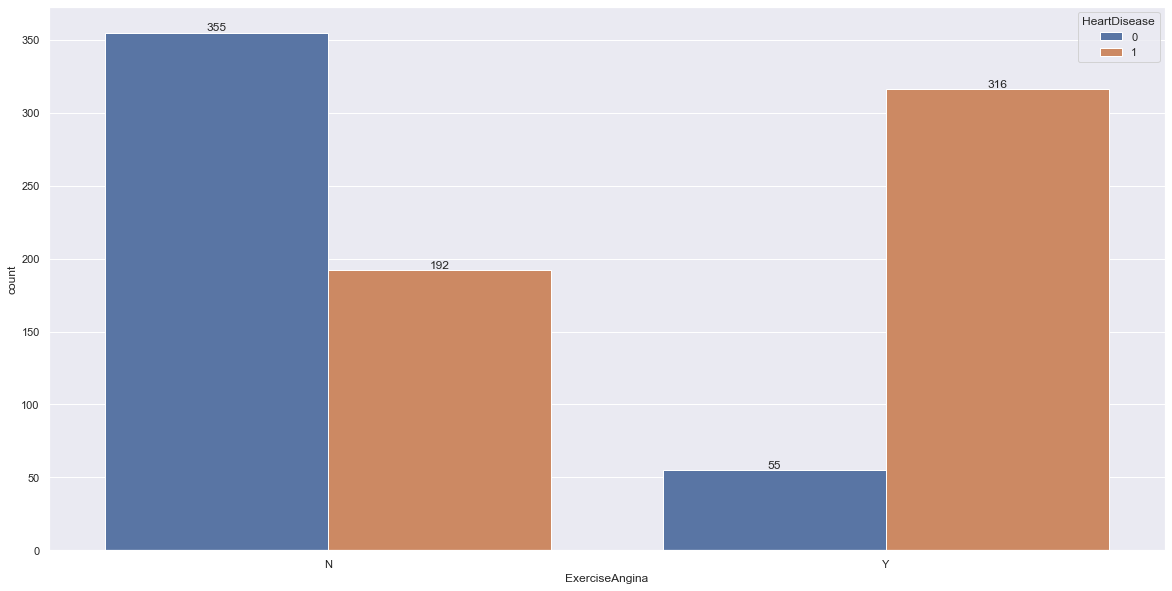

In [57]:
df['ExerciseAngina']
plt.figure(figsize=(20,10))
ax11 = sns.countplot(data = df, x = "ExerciseAngina", hue = 'HeartDisease')
for container in ax11.containers:
    ax11.bar_label(container)

Those that have confirmed Excersie angina a significantly higher proportion of those people have heart disease. These could be a point of reference to investigate further for heart disease. 

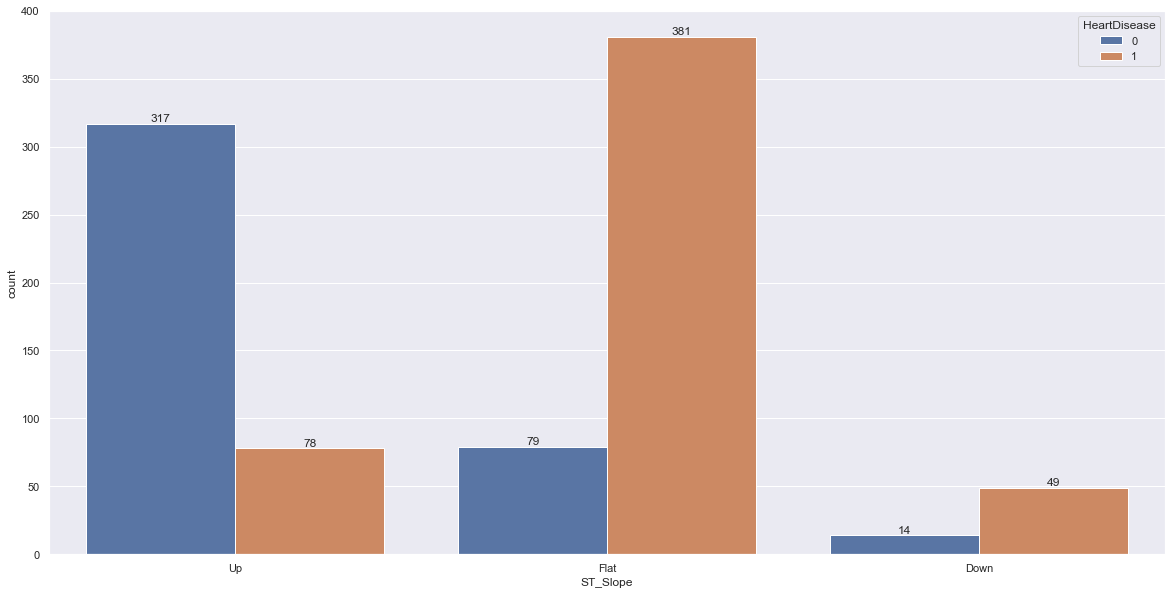

In [58]:
df['ST_Slope']
plt.figure(figsize=(20,10))
ax11 = sns.countplot(data = df, x = "ST_Slope", hue = 'HeartDisease')
for container in ax11.containers:
    ax11.bar_label(container)

# Key Takeaways: 

1. The dataset is limited in terms have number of patients used, some data points epsically those that have heart disease may be skewed. This can be improved by continuing to research into patients with heart disease and comparing with normal patients. 
2.  More indepth analyasis is needed beyond EDA,as basic analysis shows very little to indicate patients with heart disease. Alot of reltionships shown such as those with cholesterol,resting BP, MaxHR etc, do not show obvious patterns to indicate heart disease. This can be further excerbated by the fact that the Chest Pain type ASY, meaning it would be even heart to pick up in the first place. 
